In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from wordcloud import WordCloud
import os
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [11]:
def plot_conf_matrix(y_pred, y_true, title=None):
    conf_mat = confusion_matrix(y_pred, y_true)
    df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Fake", "Real"]],
                  columns = [i for i in ["Fake", "Real"]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cmap="Blues")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    if title:
        plt.title(f"{title} Confusion Matrix")
    plt.show()

# Read in Data and Preprocess

In [12]:
true_news_df = pd.read_csv("COVID19-FNIR/COVID19-FNIR/trueNews.csv")
fake_news_df = pd.read_csv("COVID19-FNIR/COVID19-FNIR/fakeNews.csv")

In [13]:
# Assign class columns and combine dataframes
fake_news_df["class"] = 0
true_news_df["class"] = 1
combined = pd.concat([fake_news_df, true_news_df], axis=0)

In [14]:
# Subset data to just contain the text field and the class field
combined = combined[["Text", "class"]].reset_index(drop=True)
# Shuffle data
combined = combined.sample(frac = 1)

In [15]:
combined.head()

,Text,class
1404,"""They're furloughing nurses in hospitals in w...",0
2828,"A family (husband, wife, child) committed sui...",0
1609,If you ask Amazon's Alexa about the origin of...,0
7173,#Sanitisers | Agency sources said some crimina...,1
6713,#Coronavirus | The ongoing return of workers l...,1


In [16]:
def wordopt(text):
    """Formating of the text field """
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text



In [17]:
combined["Text"] = combined["Text"].apply(wordopt)

In [18]:
combined.head()

,Text,class
1404,they re furloughing nurses in hospitals in w...,0
2828,a family husband wife child committed sui...,0
1609,if you ask amazon s alexa about the origin of...,0
7173,sanitisers agency sources said some crimina...,1
6713,coronavirus the ongoing return of workers l...,1


In [19]:
# Set X and y variables
X = combined["Text"]
y = combined["class"]

In [20]:
# Split data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 

vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

# Model 1: Simple Sklearn Logistic Regression Model

In [23]:
lr_model = LogisticRegression()
# Fit model 
lr_model.fit(X_train, y_train)
# Predict 
y_pred = lr_model.predict(X_test)

In [24]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9931470743278862


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       954
           1       1.00      0.99      0.99       943

    accuracy                           0.99      1897
   macro avg       0.99      0.99      0.99      1897
weighted avg       0.99      0.99      0.99      1897



In [26]:
# Add confusion matrix and roc plot, maybe calulate some other metrics as well

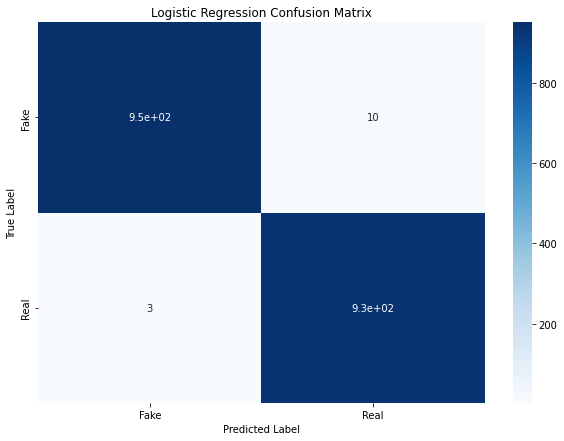

In [27]:
plot_conf_matrix(y_pred, y_test, title="Logistic Regression")

# Model 2 Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
# Fit model 
dt_model.fit(X_train, y_train)
# Predict 
y_pred = dt_model.predict(X_test)

In [29]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9957828149710068


In [30]:
print(classification_report(y_test, pred_dt))

NameError: name 'pred_dt' is not defined

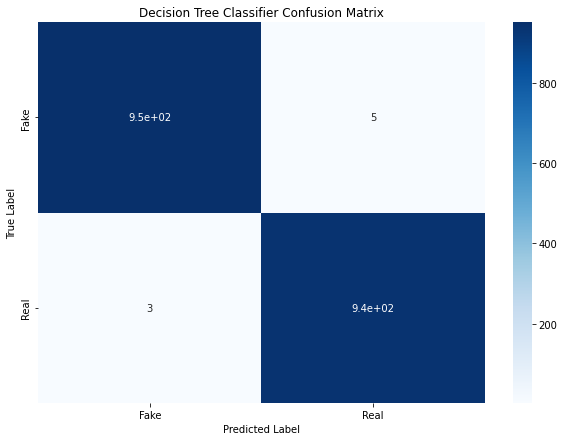

In [31]:
plot_conf_matrix(y_pred, y_test, title="Decision Tree Classifier")

# Model 3: Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier()
# Fit model 
gbt_model.fit(X_train, y_train)
# Predict 
y_pred = gbt_model.predict(X_test)

In [ ]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
plot_conf_matrix(y_pred, y_test, title="Gradient Boosting Classifier Classifier")

# Model 4: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
# Fit model 
rf_model.fit(X_train, y_train)
# Predict 
y_pred = rf_model.predict(X_test)

In [ ]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
plot_conf_matrix(y_pred, y_test, title="Randome Forest Classifier")

# LSTM Model